# Modules

In [42]:
# OS
import os
from os.path import join
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Technical Analaysis Library
import talib
# Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier 

# Parameters

In [58]:
dir_data = join( '..', 'data' )
file_path1 = join( dir_data, 'train.csv' )
file_path2 = join( dir_data, 'test.csv' )

# Load Data

In [59]:
train = pd.read_csv( file_path1, index_col=0)
test = pd.read_csv( file_path2, index_col=0)


# Explorations

In [60]:
print(type(train))
print(train.keys())
print(train.shape)
train.head()

print(type(test))
print(test.keys())
print(test.shape)
test.head()

<class 'pandas.core.frame.DataFrame'>
Index(['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color',
       'type'],
      dtype='object')
(371, 6)
<class 'pandas.core.frame.DataFrame'>
Index(['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color'], dtype='object')
(529, 5)


,bone_length,rotting_flesh,hair_length,has_soul,color
id,,,,,
3,0.471774,0.387937,0.706087,0.698537,black
6,0.427332,0.645024,0.565558,0.451462,white
9,0.549602,0.491931,0.660387,0.449809,black
10,0.638095,0.682867,0.471409,0.356924,white
13,0.361762,0.583997,0.377256,0.276364,black


In [61]:
train.columns

Index(['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color',
       'type'],
      dtype='object')

In [62]:
print(np.sort(train['type'].unique()))
print(np.sort(train['color'].unique()))
print(np.sort(test['color'].unique()))

['Ghost' 'Ghoul' 'Goblin']
['black' 'blood' 'blue' 'clear' 'green' 'white']
['black' 'blood' 'blue' 'clear' 'green' 'white']


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 897
Data columns (total 6 columns):
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), object(2)
memory usage: 20.3+ KB


In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 3 to 899
Data columns (total 5 columns):
bone_length      529 non-null float64
rotting_flesh    529 non-null float64
hair_length      529 non-null float64
has_soul         529 non-null float64
color            529 non-null object
dtypes: float64(4), object(1)
memory usage: 24.8+ KB


C:\Users\alibi\OneDrive\Desktop\New folder\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8D018A0F0>,
      dtype=object)

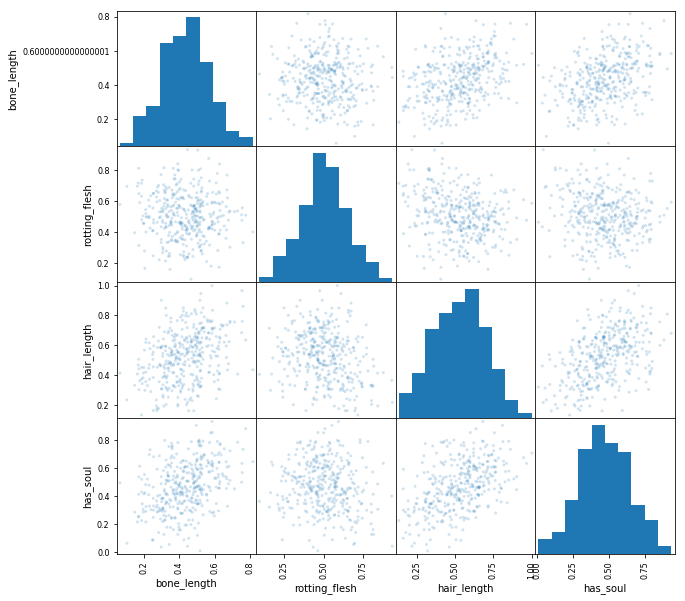

In [65]:
pd.scatter_matrix(train, alpha=0.2, figsize=(10, 10))

C:\Users\alibi\OneDrive\Desktop\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


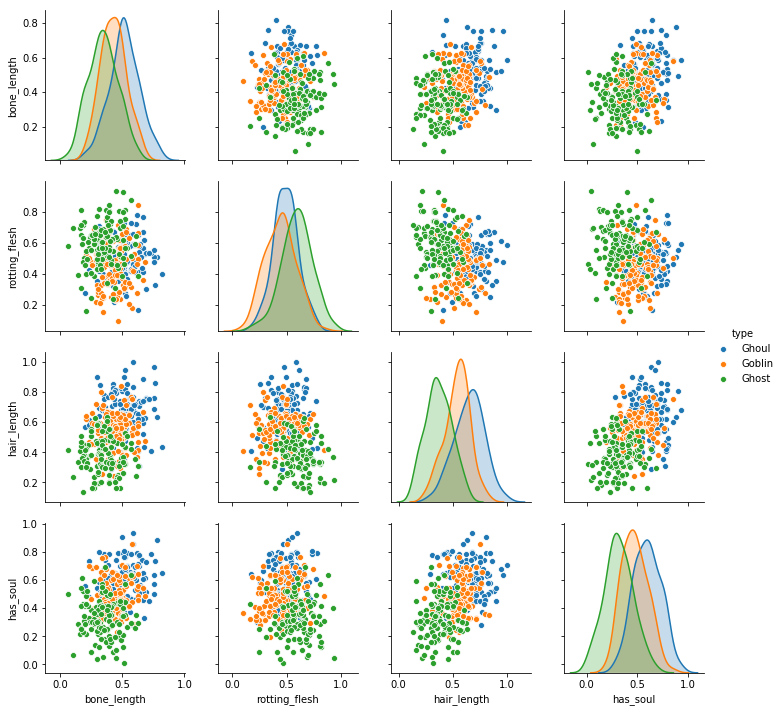

In [66]:
sns.pairplot( train,hue='type')


# Prediction

In [71]:
X_train = pd.get_dummies(train.drop("type", axis = 1))
y_train = train["type"]
X_test = pd.get_dummies(test)

In [72]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Predict the labels for the training data X: y_pred
y_pred = knn.predict(X_train)

# Predict and print the label for the new data point X_new
y_prediction = knn.predict(X_test)
print("Prediction: {}".format(y_prediction)) 

Prediction: ['Ghoul' 'Goblin' 'Ghoul' 'Ghost' 'Ghost' 'Ghost' 'Ghoul' 'Goblin'
 'Goblin' 'Ghoul' 'Ghost' 'Ghoul' 'Ghost' 'Ghost' 'Ghoul' 'Goblin'
 'Goblin' 'Ghost' 'Ghost' 'Ghoul' 'Ghoul' 'Goblin' 'Goblin' 'Goblin'
 'Ghoul' 'Goblin' 'Ghoul' 'Goblin' 'Goblin' 'Ghoul' 'Goblin' 'Ghoul'
 'Ghoul' 'Goblin' 'Goblin' 'Ghoul' 'Goblin' 'Ghoul' 'Ghost' 'Ghoul'
 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Ghoul' 'Ghoul'
 'Ghoul' 'Ghost' 'Goblin' 'Goblin' 'Ghost' 'Goblin' 'Goblin' 'Ghost'
 'Goblin' 'Ghost' 'Ghoul' 'Ghost' 'Goblin' 'Goblin' 'Ghost' 'Goblin'
 'Ghoul' 'Ghoul' 'Ghoul' 'Goblin' 'Goblin' 'Ghoul' 'Goblin' 'Ghost'
 'Goblin' 'Ghoul' 'Ghoul' 'Ghoul' 'Goblin' 'Goblin' 'Ghost' 'Goblin'
 'Ghost' 'Goblin' 'Ghoul' 'Ghoul' 'Ghost' 'Ghost' 'Goblin' 'Goblin'
 'Ghost' 'Ghost' 'Ghost' 'Ghost' 'Goblin' 'Goblin' 'Ghost' 'Ghost'
 'Goblin' 'Goblin' 'Goblin' 'Goblin' 'Ghoul' 'Goblin' 'Goblin' 'Ghost'
 'Ghoul' 'Goblin' 'Goblin' 'Ghost' 'Ghoul' 'Ghoul' 'Goblin' 'Goblin'
 'Ghost' 'Ghoul' 'Ghoul' 'G

In [73]:
knn.score(X_train,y_train)

0.8301886792452831

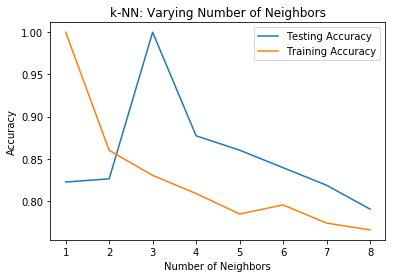

In [75]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_prediction)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()